In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

# Limits

# 0. Background

As we look to _calculus_ and beyond, allowing our inputs and outputs to _approach_ certain values (i.e. assume that they have come so close to a given value that they will actually take that value) is of much importance<sup>[link](https://en.wikipedia.org/wiki/Limit_(mathematics))</sup>. This topic is called _limits_.

# 1. Interest

### Calculating interest

Let's say you've a friend who's always short on money. Maybe she's really into skiing and every time there's a big storm she's hopping on plane to go smear dat powdah, which is great - but also, expensive AF! She's been doing this a while and now she's gone broke.

Being the good friend that you are, you want her to be able to go skiing - but you are also taking a risk in loaning her money, as she might just keep skiing (heck, I would!) and never save up enough to pay you back. So you decide to _juice that loan_, i.e. require her to pay you out for the service of borrowing your money. Essesntially, you're going to rent her money.

How would we calculate the total amount that she owes you? Let's assume a _principal_ of $100.

### --

In [132]:
def basic_total_due(principal, interest):
    return principal * (1 + interest / 100)

In [131]:
def plot_basic_interest(principal=100):
    fig = plt.figure(figsize=(11, 8))
    ax = fig.subplots(1)

    interest_rates = np.linspace(0, 25)

    totals = []
    for i in interest_rates:
        totals.append(basic_total_due(principal, i))

    plot = plt.plot(interest_rates, totals)

    xlim = fig.axes[0].set_xlim(0, 25)

    xlab = fig.axes[0].set_xlabel("interest rate (%)")
    ylab = fig.axes[0].set_ylabel("total due ($)")

    title = plt.title(f"Total due, based principal of ${principal}, across different interest rates")

    return ax

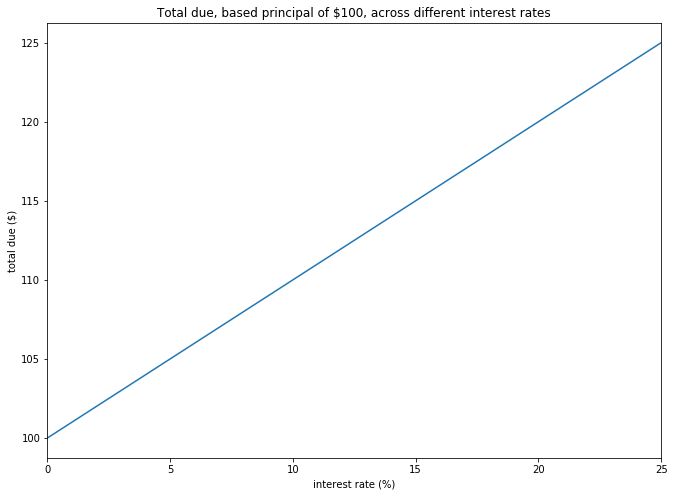

In [133]:
ax = plot_basic_interest()

### Setting an interest rate

Let's say you've collected some data on borrower credit histories. Maybe you've found a whole bunch of people whose credit profiles resemble your friend's, or maybe you've aggregated all the times your friend has borrowed - either way, let's say you've got some data.

And that data shows you that you have an 80% chance of being paid back if you lend your skier friend some money. If you lend her $100, what is the _fair value_ of this loan (setting aside _inflation_)?

[link](https://en.wikipedia.org/wiki/Expected_value)

In [1]:
100 * .8

80.0

In [2]:
100 / 80 - 1

0.25

### Reapplying interest

OK great, so we have an initial framework for charging our friend money, but it's a little blunt, isn't it? I.e. we're charging her the same value whether she pays on early, on time, or late. How can we make this a little more nuanced?

In [122]:
def basic_total_due_with_reapplying(principal, interest, num_periods_per_reapply, periods_elapsed):
    # do some stuff, calculate `total`
    return total

In [157]:
def plot_basic_interest_with_reapplying(principal=100, periods_per_reapply=1, periods_elapsed=12):
    fig = plt.figure(figsize=(11, 8))
    ax = fig.subplots(1)

    interest_rates = np.linspace(0, 25)

    totals = []
    for i in interest_rates:
        totals.append(basic_total_due_with_reapplying(principal, i, periods_per_reapply, periods_elapsed))

    plot = plt.plot(interest_rates, totals)

    xlim = fig.axes[0].set_xlim(0, 25)

    xlab = fig.axes[0].set_xlabel("interest (%)")
    ylab = fig.axes[0].set_ylabel("total due ($)")

    title = plt.title(f"Total due, based principal ${principal}, {periods_per_reapply} period(s) per reapply, {periods_elapsed} period(s) elapsed")
    
    return ax

In [ ]:
So, our formula is $100∗(1+(.05∗12)1)

In [158]:
def basic_total_due_with_reapplying(principal, interest, num_periods_per_reapply, periods_elapsed):
    return principal + principal * (interest / 100) * periods_elapsed / num_periods_per_reapply

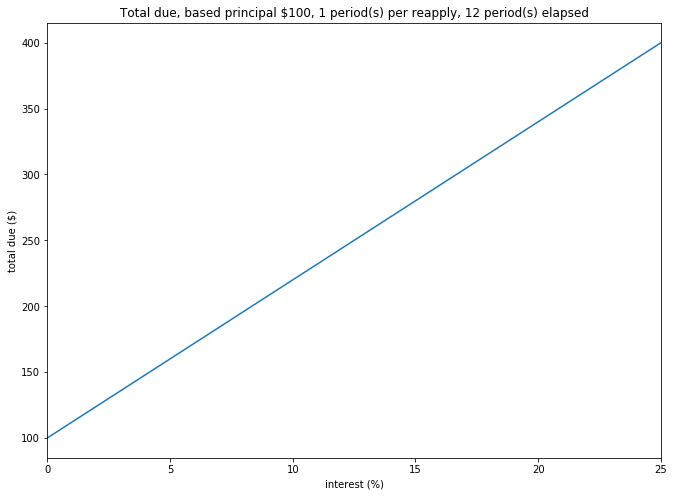

In [159]:
ax = plot_basic_interest_with_reapplying()

We can see that this, too, presents a linear relationship. Let's do a quick example:

In [160]:
basic_total_due_with_reapplying(100, 5, 1, 12)

160.0

With:
- principal of \\$100
- interest of 5% per period (1 month)
- with 12 periods elapsed

We end up with $\$100 * (1 + \frac{(.05 * 12)}{1})$

### Compounding

Ok so you figured out how to calculate basic interest - i.e. interest that's calculated as simply a fee % on top of the principal. But does that _really_ account for all the risk associated with lending your friend money? Because her being _really_ late is different from her being just _a little_ late. 

Plus, if the interest rate you're charging her is based on the likelihood of her _not paying you back at all_, might this mean you're preparing for the worst, when really the potential issues are likely not so severe? In other words, maybe you can potentially offer her a better rate, presuming there's a mechanism through which they can increase the amount of interest due over time.

Enter: compounding! Every so often we _reapply_ the interest rate to the outstanding balance (i.e. principal + interest). Can we figure out how to write a function to let us calculate the total due where interest is compounded yearly?

In [169]:
def compounded_total_due(principal, interest, periods_per_reapply, periods_elapsed):
    return principal * (1 + interest / periods_per_reapply) ** (periods_per_reapply * periods_elapsed)

In [168]:
def plot_compounded_interest(principal=100, interest=2.5, periods_elapsed=12):
    fig = plt.figure(figsize=(11, 8))
    ax = fig.subplots(1)

    periods_per_reapply = np.linspace(12, .25)

    totals = []
    for p in periods_per_reapply:
        totals.append(compounded_total_due(principal, interest, p, periods_elapsed))

    plot = plt.plot(periods_per_reapply, totals)

    xlim = fig.axes[0].set_xlim(1, 48)

    xlab = fig.axes[0].set_xlabel("compoundings per year")
    ylab = fig.axes[0].set_ylabel("total due ($)")

    title = plt.title("Total due, based adjusting the compiunding frequency")
    
    return ax

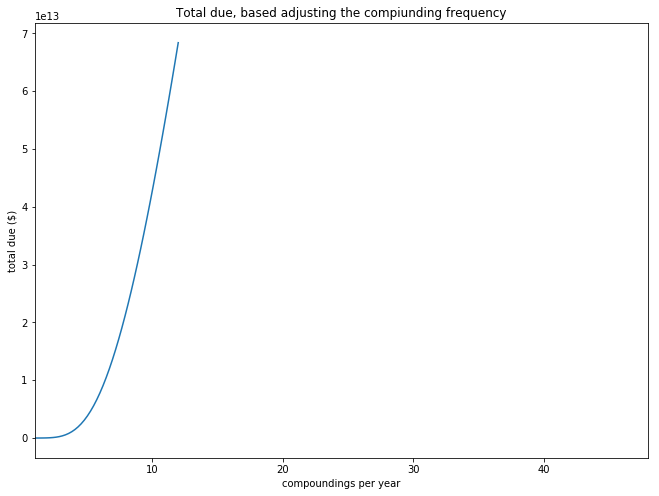

In [170]:
ax = plot_compounded_interest()

In [ ]:
Continuouis

Eueler's constant - interest

In [ ]:
Basic function to calculate interest?

In [ ]:
Compounding

In [ ]:
Continuous compounding

# 2. $\pi$

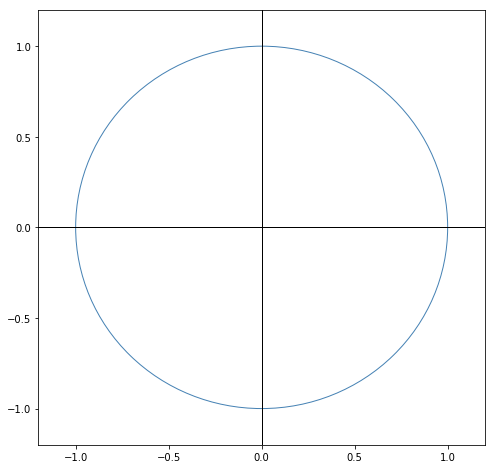

In [18]:
circle = plt.Circle((0, 0), 1, edgecolor='steelblue', facecolor="white")
fig, ax = plt.subplots(figsize=(8, 8))
c = ax.add_artist(circle)

xlim = ax.set_xlim(-1.2, 1.2)
ylim = ax.set_ylim(-1.2, 1.2)

xax = ax.axhline(y=0, color='black', linewidth=1)
yax = ax.axvline(x=0, color='black', linewidth=1)

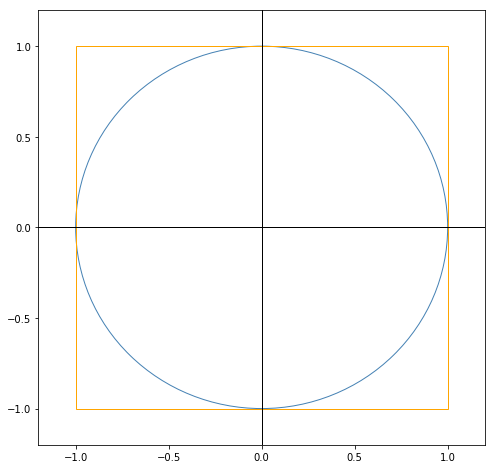

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))

circle = plt.Circle((0, 0), 1, edgecolor='steelblue', facecolor="white")
c = ax.add_artist(circle)

square = plt.Rectangle((-1, -1), 2, 2, edgecolor='orange', facecolor="none")
s = ax.add_artist(square)

xlim = ax.set_xlim(-1.2, 1.2)
ylim = ax.set_ylim(-1.2, 1.2)

xax = ax.axhline(y=0, color='black', linewidth=1)
yax = ax.axvline(x=0, color='black', linewidth=1)